In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import seaborn as sns

In [10]:
# === 1. Carregar base de dados ===
df = pd.read_csv('../../datasets/high_diamond_ranked_10min.csv')

# === 2. Definir variáveis ===
target = "blueGoldDiff"
cols_to_drop = [
    "gameId", "blueWins", "blueGoldDiff", "redGoldDiff",
    "blueTotalGold", "redTotalGold", "blueGoldPerMin", "redGoldPerMin"
]

# Remover colunas que não ajudam ou causam vazamento
features = df.drop(columns=cols_to_drop)

X = features
y = df[target]

In [11]:
# === 3. Dividir em treino e teste ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# === 4. Treinar modelos ===
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42, n_estimators=100)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# === 5. Fazer previsões ===
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [12]:
# === 6. Calcular métricas ===
def avaliar_modelo(nome, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"\nModelo: {nome}")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")

avaliar_modelo("Regressão Linear", y_test, y_pred_lr)
avaliar_modelo("Random Forest", y_test, y_pred_rf)


Modelo: Regressão Linear
MAE:  398.46
MSE:  254634.53
RMSE: 504.61

Modelo: Random Forest
MAE:  526.17
MSE:  461208.66
RMSE: 679.12


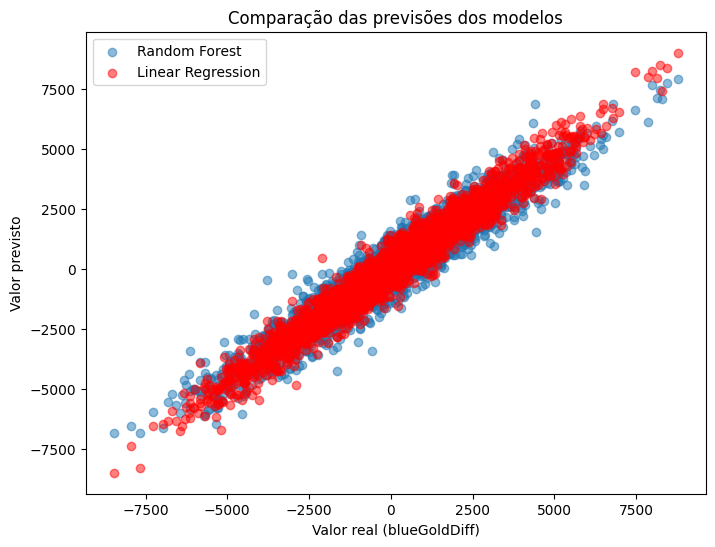

In [13]:
# === 7. Comparação visual (opcional) ===
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression', color='red')
plt.xlabel("Valor real (blueGoldDiff)")
plt.ylabel("Valor previsto")
plt.legend()
plt.title("Comparação das previsões dos modelos")
plt.show()

Tarefa: prever a diferença de ouro (blueGoldDiff) a partir de estatísticas gerais da partida.

Foram comparados dois modelos: Regressão Linear e Random Forest Regressor.

Resultados obtidos:

Linear Regression apresentou menor erro (MAE = 398.46, RMSE = 504.61).

Random Forest teve desempenho inferior (MAE = 526.17, RMSE = 679.12).

Conclusão:
O modelo linear mostrou-se mais eficiente para este conjunto de dados, indicando que a relação entre as variáveis e a diferença de ouro é predominantemente linear.
Modelos mais complexos, como Random Forest, não trouxeram ganhos significativos e podem ter sofrido com overfitting ou falta de variabilidade nas features.